In [17]:
# Dependencies and Setup
from scipy.stats.stats import pearsonr   
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression

#Load Crimes Data
crimes_csv="Crimes_Incidents_from_2008-2016.csv"
crimes1 = pd.read_csv(crimes_csv)
crimes2 = crimes1.drop(["SHIFT"], axis=1)
#Sum the cnt of crime types
crimes3=crimes2.groupby(['YEAR','NEIGHBORHOOD_CLUSTER','OFFENSE'], as_index=False)[['NUMBER_OF_CRIMES']].sum()
crimes4=pd.DataFrame(crimes3)
Crimes5=crimes4.rename(columns = {'YEAR':'Year', 'NEIGHBORHOOD_CLUSTER':'Cluster'}) 

#Pivot crime data
Crimes_crs=Crimes5.pivot_table( index=['Year',"Cluster"],
                          values=['NUMBER_OF_CRIMES'], columns=['OFFENSE'], aggfunc=sum,margins=True)
c_df=pd.DataFrame(Crimes_crs)
#Replace NaN with 0
c_df_nan=c_df.fillna(0, inplace=True)

#Flaten pivot records and create index
c_df.reset_index(inplace=True)
c_df_tbl = pd.DataFrame(c_df.to_records())
c_df_tbl.columns = ["index","Year","Cluster","ARSON", "ASSAULT W/DANGEROUS WEAPON", "BURGLARY","HOMICIDE",
                       "MOTOR VEHICLE THEFT","ROBBERY","SEX ABUSE","THEFT F/AUTO","THEFT/OTHER","All"]
c_df_tbl = c_df_tbl.drop(["index"], axis=1)

#Pivot created raw and column totals(All). Replace All in Year column
c_df_tbl['Year'] = c_df_tbl['Year'].replace("All", 0)

#c_df_tbl.style.set_caption('Crime Data by Year and Cluster')
c_df_tbl.head()

,Year,Cluster,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,All
0,2008,Cluster 1,3.0,41.0,99.0,1.0,112.0,147.0,0.0,0.0,564.0,967
1,2008,Cluster 10,0.0,1.0,40.0,1.0,27.0,9.0,1.0,0.0,143.0,222
2,2008,Cluster 11,0.0,11.0,62.0,2.0,20.0,29.0,0.0,0.0,469.0,593
3,2008,Cluster 12,0.0,3.0,31.0,0.0,16.0,4.0,1.0,0.0,168.0,223
4,2008,Cluster 13,0.0,1.0,26.0,0.0,26.0,4.0,1.0,0.0,185.0,243


In [18]:
#Load Homes Data
homes_csv="dc_housing_all_clean-2008-2016.csv"
h_df = pd.read_csv(homes_csv)
h_df_cln = h_df.drop(["Unnamed: 0"], axis=1)
h_df_all = h_df_cln[['Year', 'Cluster', 'Neighborhoods', 'Median_Price']]
#h_df_all.style.set_caption('Median Price by Year by Cluster')

In [19]:
#Merge datasets
h_n_c = pd.merge(h_df_all, c_df_tbl, on=['Year', 'Cluster'])

h_n_c.head()
#h_n_c.style.set_caption('Combined Table of Crime and Median Price by Year and Cluster')

,Year,Cluster,Neighborhoods,Median_Price,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,All
0,2008,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1391251,3.0,41.0,99.0,1.0,112.0,147.0,0.0,0.0,564.0,967
1,2009,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",955000,1.0,45.0,91.0,1.0,75.0,116.0,1.0,138.0,396.0,864
2,2010,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1170000,0.0,32.0,61.0,2.0,82.0,102.0,6.0,313.0,268.0,866
3,2011,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1455000,0.0,41.0,65.0,2.0,65.0,122.0,5.0,408.0,312.0,1020
4,2012,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1060000,0.0,38.0,56.0,0.0,43.0,120.0,2.0,342.0,364.0,965


In [20]:
# Separete clusters
cluster_1 = h_n_c[h_n_c.Cluster == 'Cluster 1']
cluster_2 = h_n_c[h_n_c.Cluster == 'Cluster 2']
cluster_3 = h_n_c[h_n_c.Cluster == 'Cluster 3']
cluster_4 = h_n_c[h_n_c.Cluster == 'Cluster 4']
cluster_5 = h_n_c[h_n_c.Cluster == 'Cluster 5']
cluster_6 = h_n_c[h_n_c.Cluster == 'Cluster 6']
cluster_7 = h_n_c[h_n_c.Cluster == 'Cluster 7']
cluster_8 = h_n_c[h_n_c.Cluster == 'Cluster 8']
cluster_9 = h_n_c[h_n_c.Cluster == 'Cluster 9']
cluster_10 = h_n_c[h_n_c.Cluster == 'Cluster 10']
cluster_11 = h_n_c[h_n_c.Cluster == 'Cluster 11']
cluster_12 = h_n_c[h_n_c.Cluster == 'Cluster 12']
cluster_13 = h_n_c[h_n_c.Cluster == 'Cluster 13']
cluster_14 = h_n_c[h_n_c.Cluster == 'Cluster 14']
cluster_15 = h_n_c[h_n_c.Cluster == 'Cluster 15']
cluster_16 = h_n_c[h_n_c.Cluster == 'Cluster 16']
cluster_17 = h_n_c[h_n_c.Cluster == 'Cluster 17']
cluster_18 = h_n_c[h_n_c.Cluster == 'Cluster 18']
cluster_19 = h_n_c[h_n_c.Cluster == 'Cluster 19']
cluster_20 = h_n_c[h_n_c.Cluster == 'Cluster 20']
cluster_21 = h_n_c[h_n_c.Cluster == 'Cluster 21']
cluster_22 = h_n_c[h_n_c.Cluster == 'Cluster 22']
cluster_23 = h_n_c[h_n_c.Cluster == 'Cluster 23']
cluster_24 = h_n_c[h_n_c.Cluster == 'Cluster 24']
cluster_25 = h_n_c[h_n_c.Cluster == 'Cluster 25']
cluster_26 = h_n_c[h_n_c.Cluster == 'Cluster 26']
cluster_27 = h_n_c[h_n_c.Cluster == 'Cluster 27']
cluster_28 = h_n_c[h_n_c.Cluster == 'Cluster 28']
cluster_29 = h_n_c[h_n_c.Cluster == 'Cluster 29']
cluster_30 = h_n_c[h_n_c.Cluster == 'Cluster 30']
cluster_31 = h_n_c[h_n_c.Cluster == 'Cluster 31']
cluster_32 = h_n_c[h_n_c.Cluster == 'Cluster 32']
cluster_33 = h_n_c[h_n_c.Cluster == 'Cluster 33']
cluster_34 = h_n_c[h_n_c.Cluster == 'Cluster 34']
cluster_35 = h_n_c[h_n_c.Cluster == 'Cluster 35']
cluster_36 = h_n_c[h_n_c.Cluster == 'Cluster 36']
cluster_37 = h_n_c[h_n_c.Cluster == 'Cluster 37']
cluster_38 = h_n_c[h_n_c.Cluster == 'Cluster 38']
cluster_39 = h_n_c[h_n_c.Cluster == 'Cluster 39']
cluster_1.head()

,Year,Cluster,Neighborhoods,Median_Price,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,All
0,2008,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1391251,3.0,41.0,99.0,1.0,112.0,147.0,0.0,0.0,564.0,967
1,2009,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",955000,1.0,45.0,91.0,1.0,75.0,116.0,1.0,138.0,396.0,864
2,2010,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1170000,0.0,32.0,61.0,2.0,82.0,102.0,6.0,313.0,268.0,866
3,2011,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1455000,0.0,41.0,65.0,2.0,65.0,122.0,5.0,408.0,312.0,1020
4,2012,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1060000,0.0,38.0,56.0,0.0,43.0,120.0,2.0,342.0,364.0,965


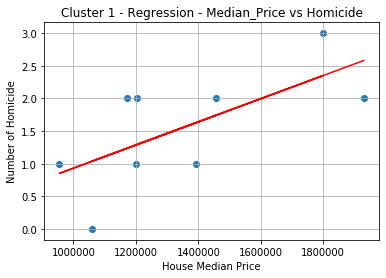

In [23]:
# Regression - Cluster 1
x = np.array(cluster_1['Median_Price']).reshape((-1,1))
y = np.array(cluster_1['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 1 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

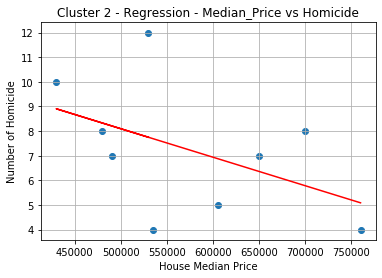

In [24]:
# Regression - Cluster 2
x = np.array(cluster_2['Median_Price']).reshape((-1,1))
y = np.array(cluster_2['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 2 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

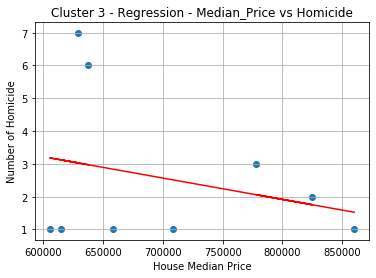

In [26]:
# Regression - Cluster 3
x = np.array(cluster_3['Median_Price']).reshape((-1,1))
y = np.array(cluster_3['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 3 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

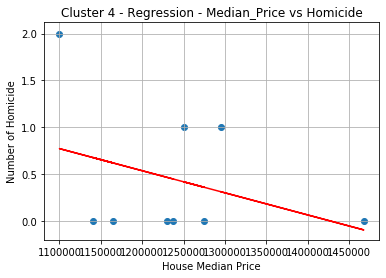

In [28]:
# Regression - Cluster 4
x = np.array(cluster_4['Median_Price']).reshape((-1,1))
y = np.array(cluster_4['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 4 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

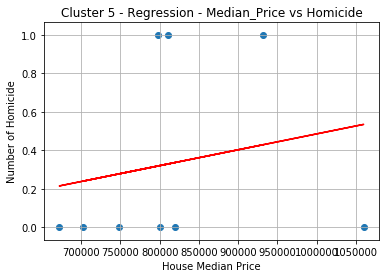

In [29]:
# Regression - Cluster 5
x = np.array(cluster_5['Median_Price']).reshape((-1,1))
y = np.array(cluster_5['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 5 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

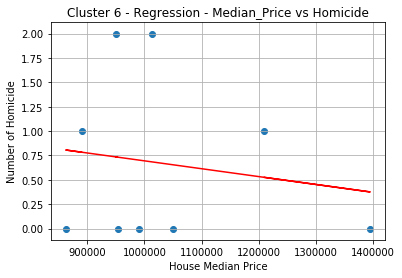

In [30]:
# Regression - Cluster 6
x = np.array(cluster_6['Median_Price']).reshape((-1,1))
y = np.array(cluster_6['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 6 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

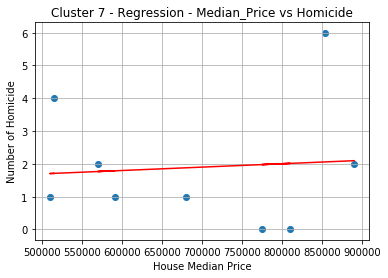

In [31]:
# Regression - Cluster 7
x = np.array(cluster_7['Median_Price']).reshape((-1,1))
y = np.array(cluster_7['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 7 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

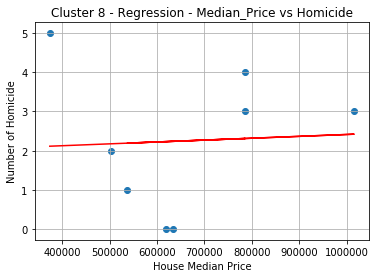

In [32]:
# Regression - Cluster 8
x = np.array(cluster_8['Median_Price']).reshape((-1,1))
y = np.array(cluster_8['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 8 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

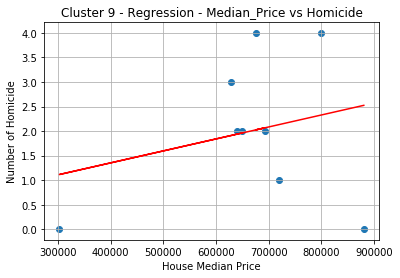

In [33]:
# Regression - Cluster 9
x = np.array(cluster_9['Median_Price']).reshape((-1,1))
y = np.array(cluster_9['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 9 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

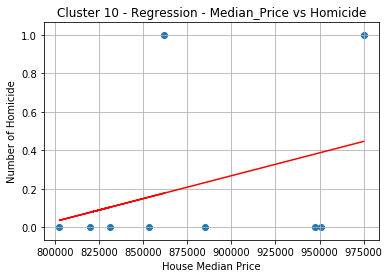

In [34]:
# Regression - Cluster 10
x = np.array(cluster_10['Median_Price']).reshape((-1,1))
y = np.array(cluster_10['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 10 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

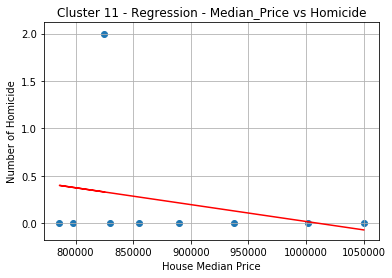

In [35]:
# Regression - Cluster 11
x = np.array(cluster_11['Median_Price']).reshape((-1,1))
y = np.array(cluster_11['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 11 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

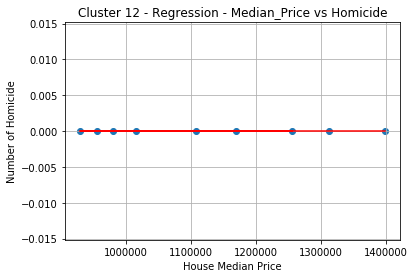

In [36]:
# Regression - Cluster 12
x = np.array(cluster_12['Median_Price']).reshape((-1,1))
y = np.array(cluster_12['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 12 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

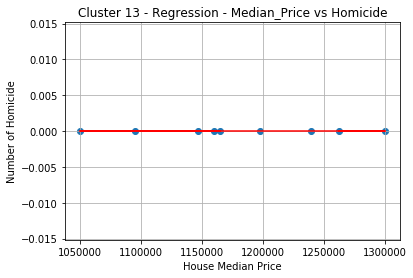

In [37]:
# Regression - Cluster 13
x = np.array(cluster_13['Median_Price']).reshape((-1,1))
y = np.array(cluster_13['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 13 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

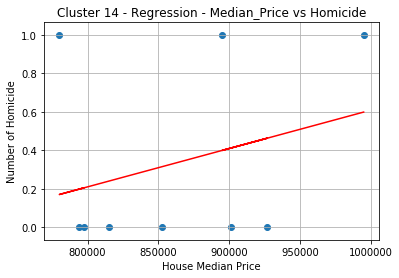

In [38]:
# Regression - Cluster 14
x = np.array(cluster_14['Median_Price']).reshape((-1,1))
y = np.array(cluster_14['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 14 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

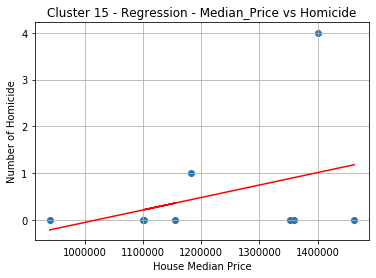

In [39]:
# Regression - Cluster 15
x = np.array(cluster_15['Median_Price']).reshape((-1,1))
y = np.array(cluster_15['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 15 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

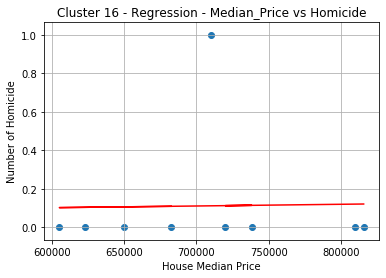

In [40]:
# Regression - Cluster 16
x = np.array(cluster_16['Median_Price']).reshape((-1,1))
y = np.array(cluster_16['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 16 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

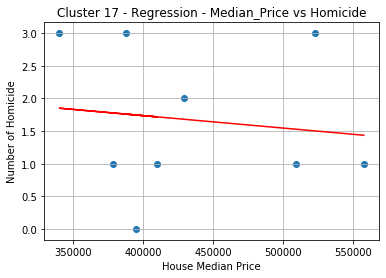

In [41]:
# Regression - Cluster 17
x = np.array(cluster_17['Median_Price']).reshape((-1,1))
y = np.array(cluster_17['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 17 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

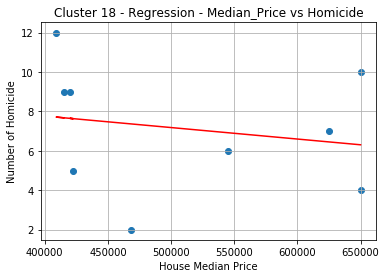

In [42]:
# Regression - Cluster 18
x = np.array(cluster_18['Median_Price']).reshape((-1,1))
y = np.array(cluster_18['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 18 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

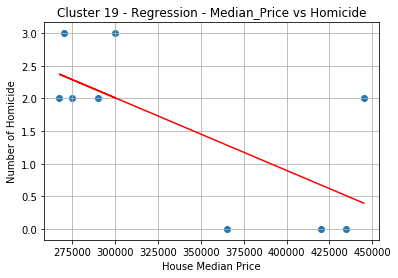

In [43]:
# Regression - Cluster 19
x = np.array(cluster_19['Median_Price']).reshape((-1,1))
y = np.array(cluster_19['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 19 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

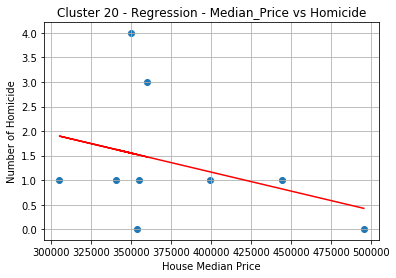

In [44]:
# Regression - Cluster 20
x = np.array(cluster_20['Median_Price']).reshape((-1,1))
y = np.array(cluster_20['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 20 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

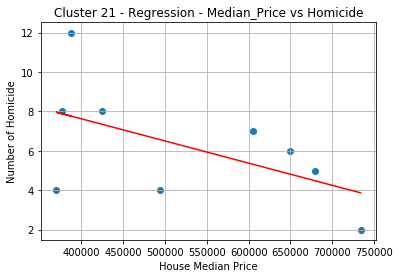

In [45]:
# Regression - Cluster 21
x = np.array(cluster_21['Median_Price']).reshape((-1,1))
y = np.array(cluster_21['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 21 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

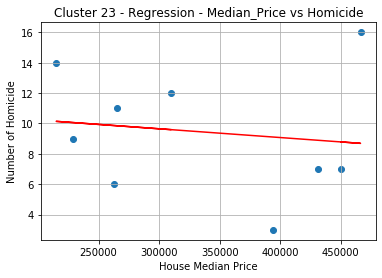

In [46]:
# Regression - Cluster 23
x = np.array(cluster_23['Median_Price']).reshape((-1,1))
y = np.array(cluster_23['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 23 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

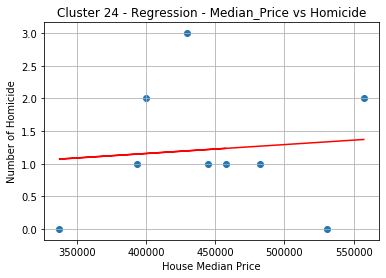

In [47]:
# Regression - Cluster 24
x = np.array(cluster_24['Median_Price']).reshape((-1,1))
y = np.array(cluster_24['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 24 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

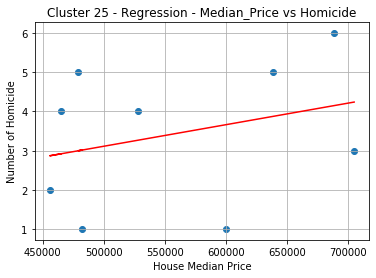

In [48]:
# Regression - Cluster 25
x = np.array(cluster_25['Median_Price']).reshape((-1,1))
y = np.array(cluster_25['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 25 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

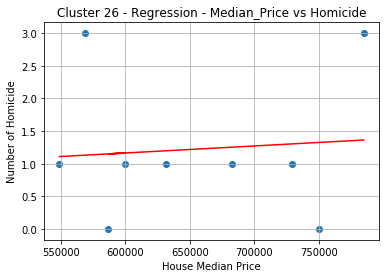

In [49]:
# Regression - Cluster 26
x = np.array(cluster_26['Median_Price']).reshape((-1,1))
y = np.array(cluster_26['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 26 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

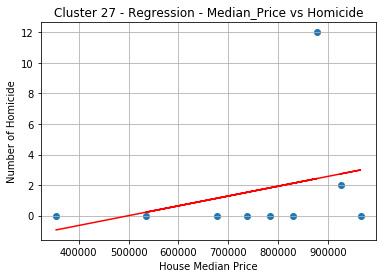

In [50]:
# Regression - Cluster 27
x = np.array(cluster_27['Median_Price']).reshape((-1,1))
y = np.array(cluster_27['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 27 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

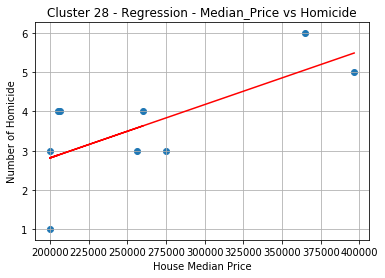

In [51]:
# Regression - Cluster 28
x = np.array(cluster_28['Median_Price']).reshape((-1,1))
y = np.array(cluster_28['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 28 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

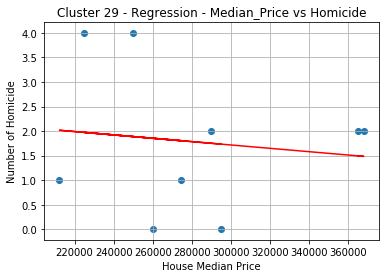

In [52]:
# Regression - Cluster 29
x = np.array(cluster_29['Median_Price']).reshape((-1,1))
y = np.array(cluster_29['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 29 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

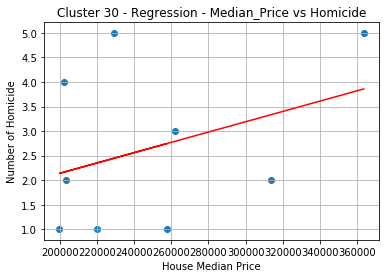

In [53]:
# Regression - Cluster 30
x = np.array(cluster_30['Median_Price']).reshape((-1,1))
y = np.array(cluster_30['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 30 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

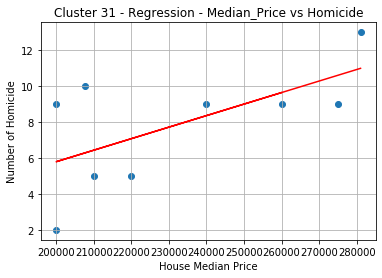

In [54]:
# Regression - Cluster 31
x = np.array(cluster_31['Median_Price']).reshape((-1,1))
y = np.array(cluster_31['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 31 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

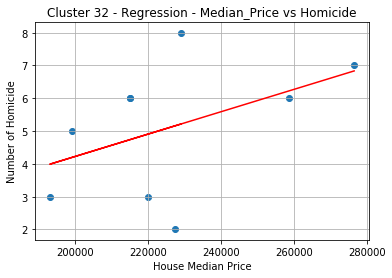

In [55]:
# Regression - Cluster 32
x = np.array(cluster_32['Median_Price']).reshape((-1,1))
y = np.array(cluster_32['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 32 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

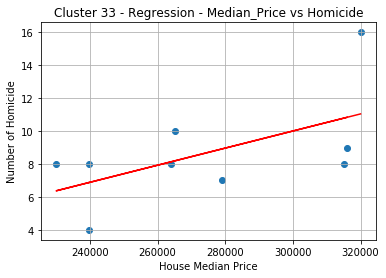

In [56]:
# Regression - Cluster 33
x = np.array(cluster_33['Median_Price']).reshape((-1,1))
y = np.array(cluster_33['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 33 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

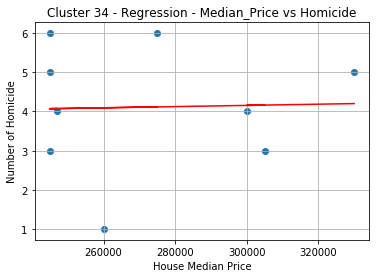

In [57]:
# Regression - Cluster 34
x = np.array(cluster_34['Median_Price']).reshape((-1,1))
y = np.array(cluster_34['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 34 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

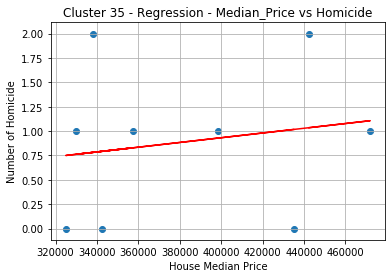

In [58]:
# Regression - Cluster 35
x = np.array(cluster_35['Median_Price']).reshape((-1,1))
y = np.array(cluster_35['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 35 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

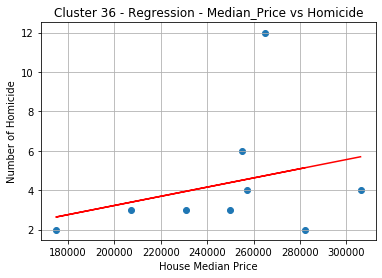

In [59]:
# Regression - Cluster 36
x = np.array(cluster_36['Median_Price']).reshape((-1,1))
y = np.array(cluster_36['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 36 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

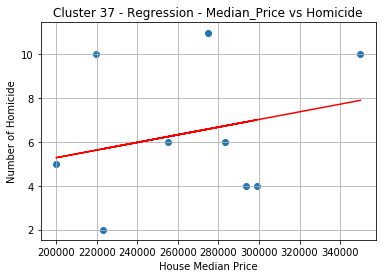

In [60]:
# Regression - Cluster 37
x = np.array(cluster_37['Median_Price']).reshape((-1,1))
y = np.array(cluster_37['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 37 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

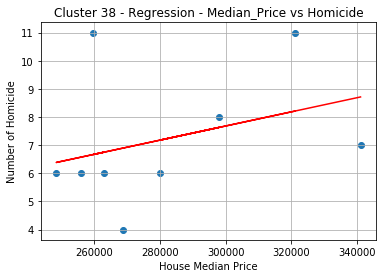

In [61]:
# Regression - Cluster 38
x = np.array(cluster_38['Median_Price']).reshape((-1,1))
y = np.array(cluster_38['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 38 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

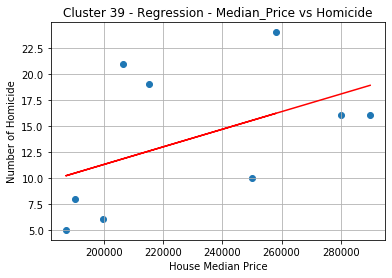

In [62]:
# Regression - Cluster 39
x = np.array(cluster_39['Median_Price']).reshape((-1,1))
y = np.array(cluster_39['HOMICIDE'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

# Incorporate the other graph properties
plt.title('Cluster 39 - Regression - Median_Price vs Homicide')
plt.ylabel('Number of Homicide')
plt.xlabel('House Median Price')
plt.grid()

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

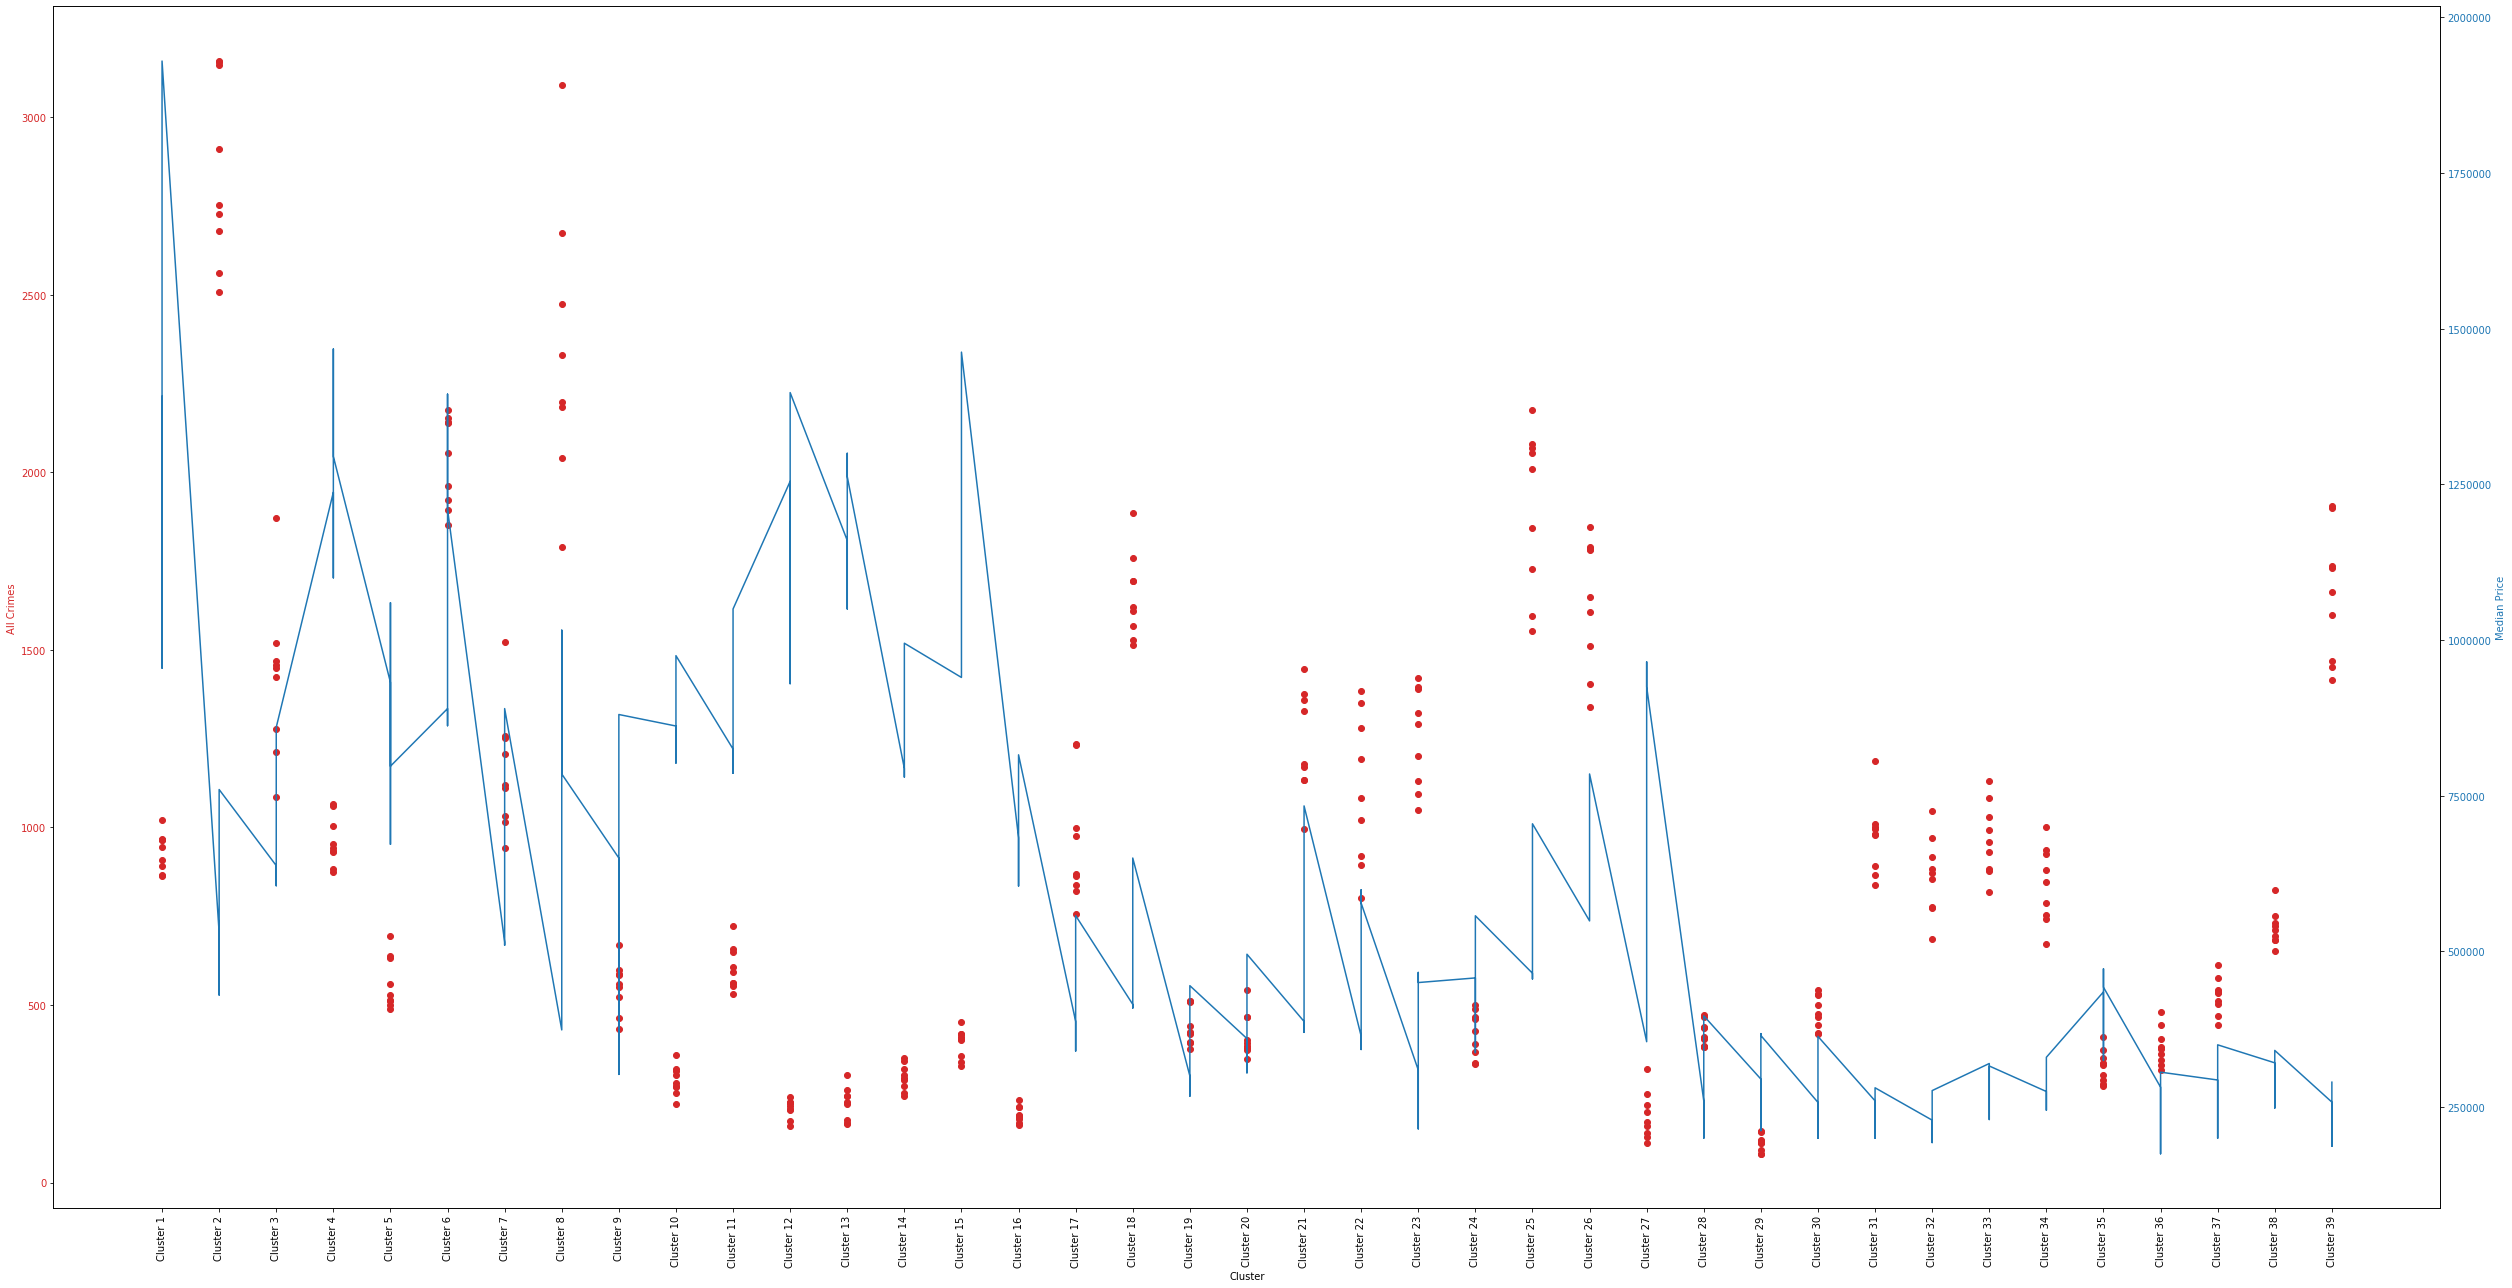

In [4]:
# Fig01 Generate a line scatter/plot for both crimes and price by all clusters

fig, ax1 = plt.subplots(figsize=(35, 18))

color = 'tab:red'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('All Crimes', color=color)
ax1.scatter(h_n_c['Cluster'], h_n_c['All'], color=color)
plt.xticks(rotation=90)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Median Price', color=color)  # we already handled the x-label with ax1
ax2.plot(h_n_c['Cluster'], h_n_c['Median_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


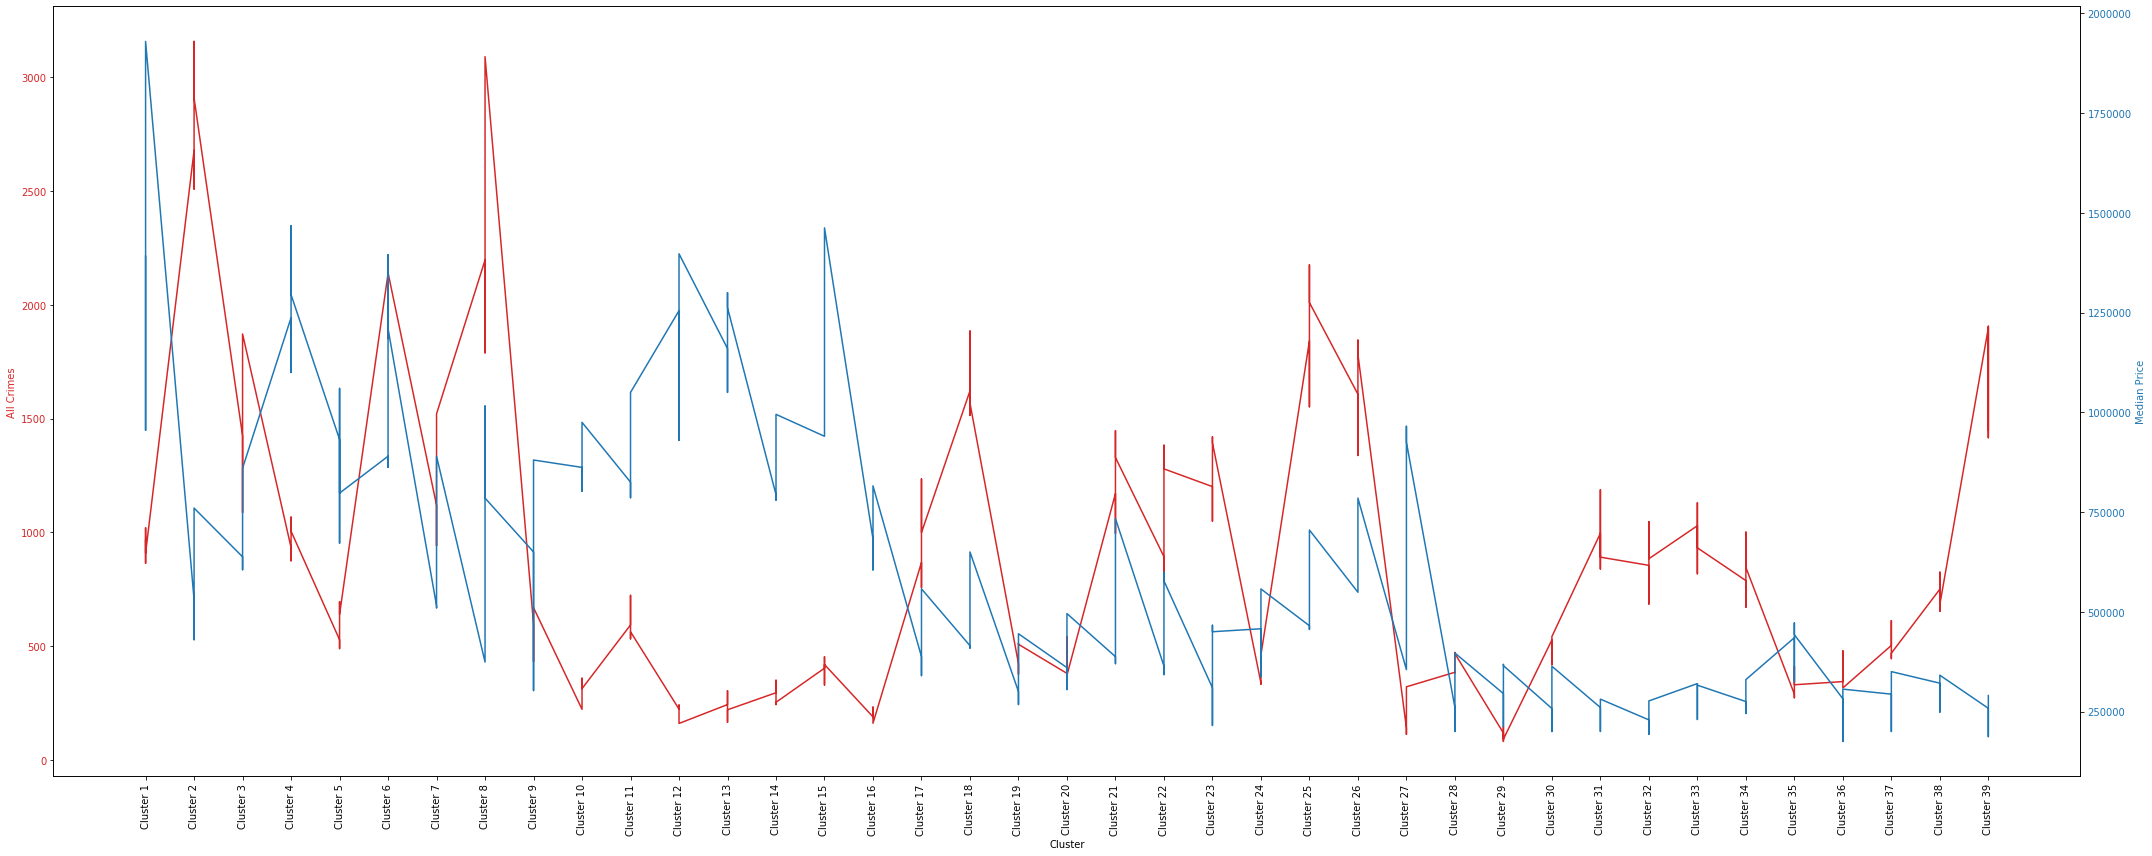

In [5]:
# Fig02 Generate a line scatter/plot for both crimes and price by all clusters. (Choose btn 01 & 02)

fig, ax1 = plt.subplots(figsize=(30, 12))

color = 'tab:red'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('All Crimes', color=color)
ax1.plot(h_n_c['Cluster'], h_n_c['All'], color=color)
plt.xticks(rotation=90)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Median Price', color=color)  # we already handled the x-label with ax1
ax2.plot(h_n_c['Cluster'], h_n_c['Median_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

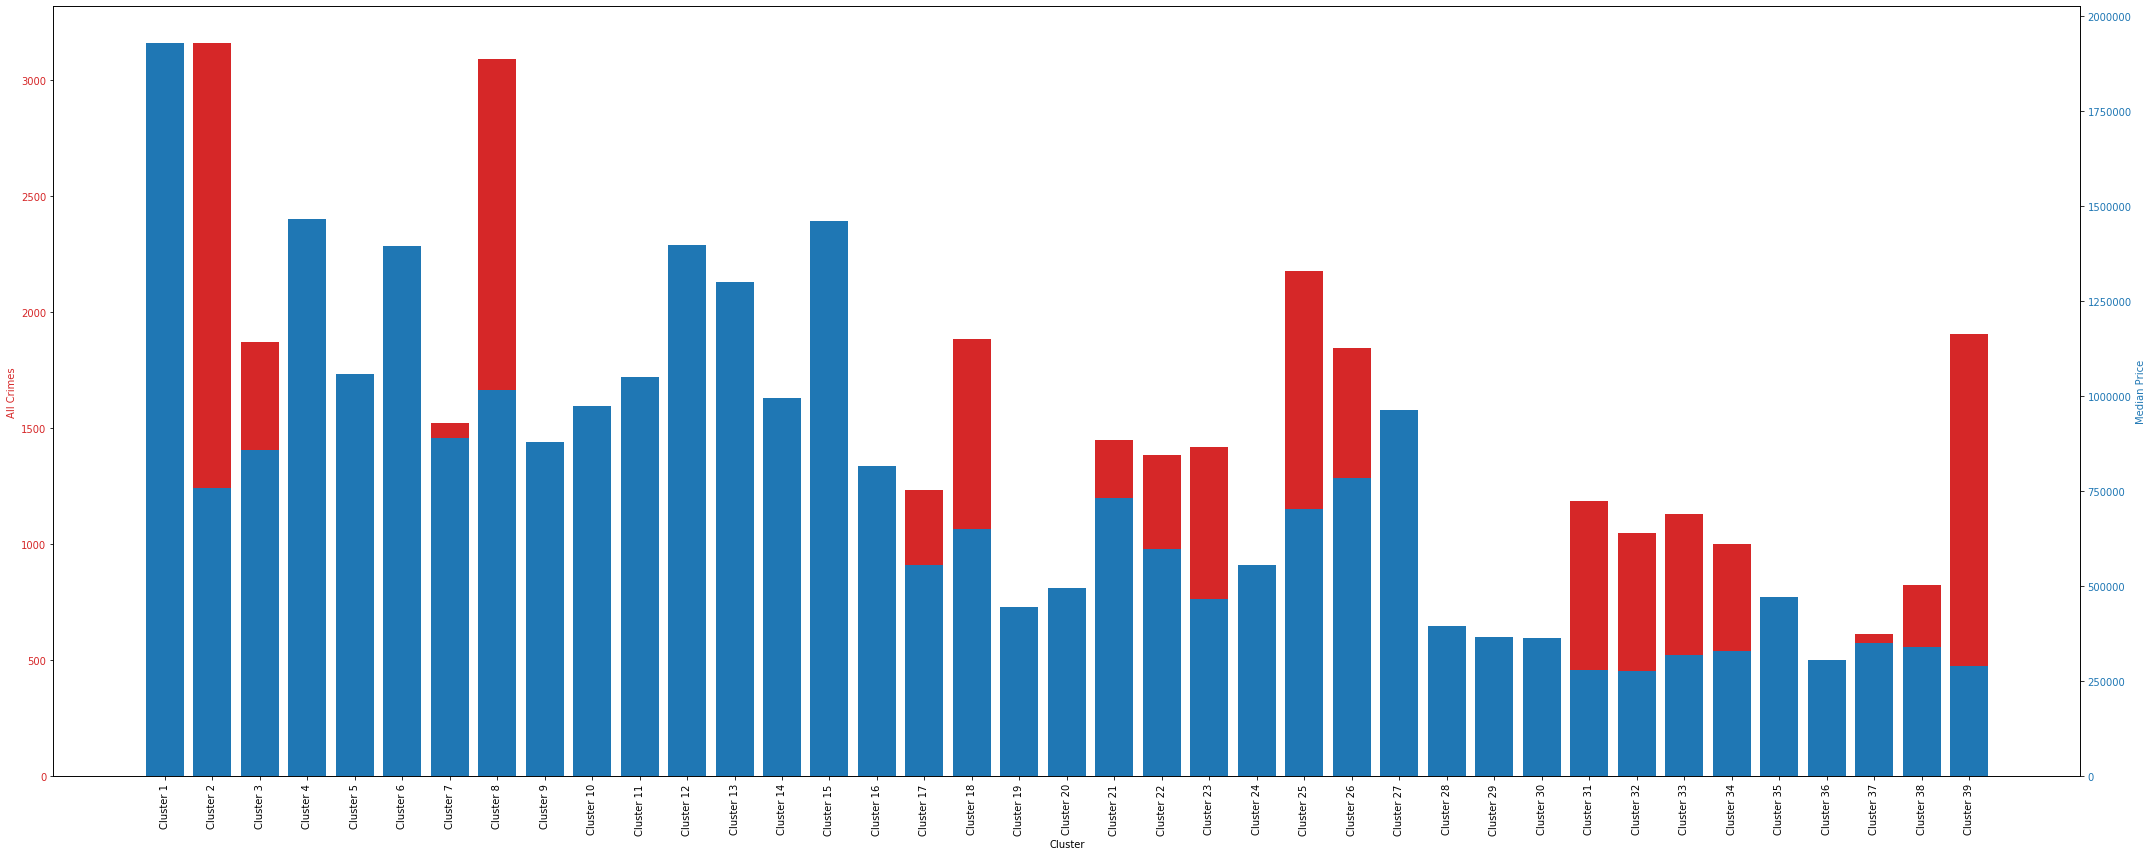

In [6]:
# Fig03 Generate a line bar for both crimes and price by all clusters. (Choose btn 01 & 02 & 03)

fig, ax1 = plt.subplots(figsize=(30, 12))

color = 'tab:red'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('All Crimes', color=color)
ax1.bar(h_n_c['Cluster'], h_n_c['All'], color=color)
plt.xticks(rotation=90)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Median Price', color=color)  # we already handled the x-label with ax1
ax2.bar(h_n_c['Cluster'], h_n_c['Median_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [7]:
#Find correlations between new dataset
crr_df=pd.DataFrame(h_n_c.corr())
crr_df

,Year,Median_Price,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,All
Year,1.000000,0.188957,-0.276125,-0.046576,-0.184909,-0.037255,-0.276984,-0.087796,0.381036,0.362161,0.030892,0.083772
Median_Price,0.188957,1.000000,-0.387428,-0.518194,-0.314466,-0.469367,-0.494346,-0.315869,-0.148635,0.151130,0.221914,-0.011822
ARSON,-0.276125,-0.387428,1.000000,0.610938,0.613979,0.585107,0.660352,0.522764,0.225662,0.039002,0.119540,0.328605
ASSAULT W/DANGEROUS WEAPON,-0.046576,-0.518194,0.610938,1.000000,0.799367,0.780832,0.846345,0.827111,0.658395,0.258525,0.334716,0.623961
BURGLARY,-0.184909,-0.314466,0.613979,0.799367,1.000000,0.600988,0.768907,0.806939,0.503126,0.327725,0.370667,0.657049
HOMICIDE,-0.037255,-0.469367,0.585107,0.780832,0.600988,1.000000,0.708374,0.556726,0.423906,0.055558,0.091321,0.346481
MOTOR VEHICLE THEFT,-0.276984,-0.494346,0.660352,0.846345,0.768907,0.708374,1.000000,0.760542,0.444411,0.165395,0.331745,0.578634
ROBBERY,-0.087796,-0.315869,0.522764,0.827111,0.806939,0.556726,0.760542,1.000000,0.666000,0.546736,0.580127,0.842096
SEX ABUSE,0.381036,-0.148635,0.225662,0.658395,0.503126,0.423906,0.444411,0.666000,1.000000,0.621661,0.538678,0.729905
THEFT F/AUTO,0.362161,0.151130,0.039002,0.258525,0.327725,0.055558,0.165395,0.546736,0.621661,1.000000,0.604162,0.794860


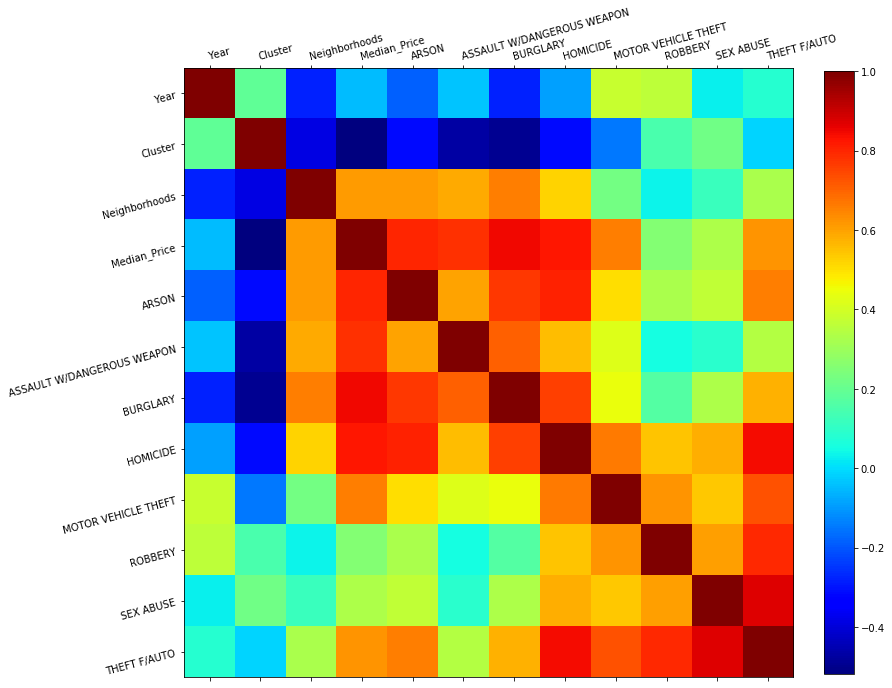

In [8]:
#Mat Show Correlation
columns = h_n_c.columns
corr_matrix = h_n_c.corr()


fig, ax = plt.subplots(figsize=(12, 12))
mat = ax.matshow(corr_matrix, cmap='jet')

ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))

ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
ax.yaxis.set_tick_params(rotation=15)
plt.setp(ax.get_xticklabels(), rotation=15, ha='left', rotation_mode='anchor')
plt.colorbar(mat, fraction=0.045, pad=0.045)


plt.imshow(corr_matrix,cmap='jet')

plt.show()




In [9]:
#Percent Change all culsters by year by crime type
h_n_c_Percent=h_n_c.groupby('Year').agg({'Median_Price':'mean', 
                                        'ARSON':'sum',
                                        "ASSAULT W/DANGEROUS WEAPON":'sum',
                                        "BURGLARY":'sum',
                                        "HOMICIDE":'sum',
                                        "MOTOR VEHICLE THEFT":'sum',
                                        "ROBBERY":'sum',
                                        "THEFT F/AUTO":'sum',
                                        "THEFT/OTHER":'sum',
                                        "All":'sum',
                                        })
h_n_c_df1=h_n_c_Percent.pct_change()
h_n_c_df=pd.DataFrame(h_n_c_df1)
h_n_c_df=h_n_c_df.reset_index()

h_n_c_df

,Year,Median_Price,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,THEFT F/AUTO,THEFT/OTHER,All
0,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,-0.067282,-0.157895,-0.201175,-0.090983,-0.267045,-0.200188,-0.144981,inf,-0.350900,-0.145111
2,2010,0.036115,-0.020833,-0.001731,0.192456,-0.031008,-0.134773,0.038188,1.098650,-0.189595,0.081524
3,2011,-0.015862,-0.085106,-0.038578,-0.053798,-0.152000,-0.124559,0.060939,0.150792,0.091957,0.048306
4,2012,0.058034,-0.209302,0.048693,-0.058436,-0.160377,-0.135462,0.067529,0.035472,0.197267,0.063246
5,2013,0.126158,0.029412,0.012038,-0.069052,0.146067,-0.061671,-0.048715,0.044119,0.064210,0.018533
6,2014,0.006117,-0.257143,0.033135,-0.054655,0.029412,0.175774,-0.177834,0.113144,0.132581,0.070268
7,2015,0.092862,-0.307692,-0.039474,-0.201398,0.495238,-0.072798,0.015804,-0.000982,-0.021866,-0.030702
8,2016,0.056026,-0.666667,-0.040240,-0.162291,-0.133758,-0.072555,-0.104027,0.073849,0.021501,0.001416


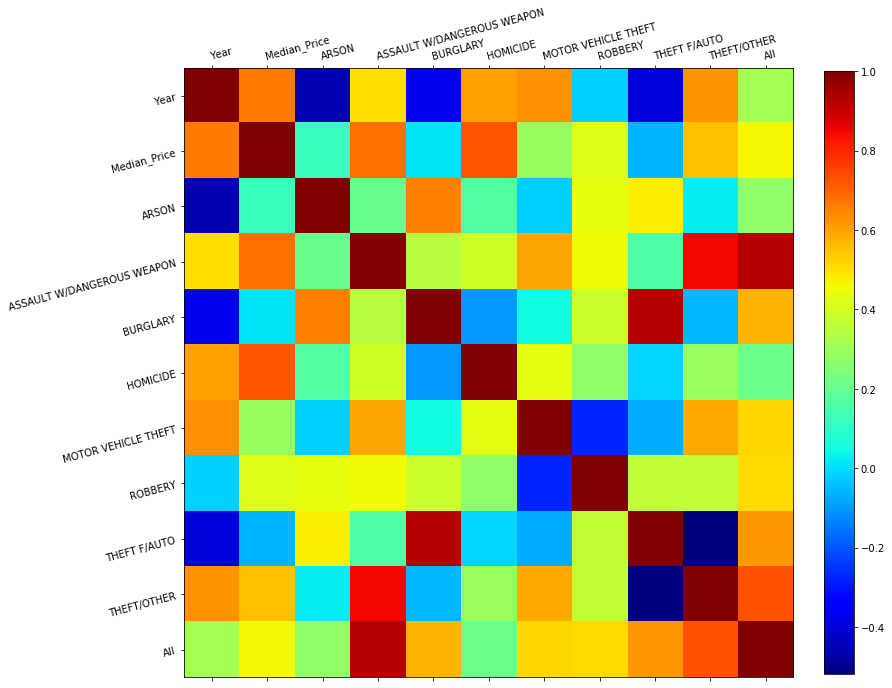

In [12]:
#Mat Show Correlation of Percent Change
columns = h_n_c_df.columns
h_n_c_df_corr = h_n_c_df.corr()


fig, ax = plt.subplots(figsize=(12, 12))
mat = ax.matshow(corr_matrix, cmap='jet')

ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))

ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
ax.yaxis.set_tick_params(rotation=15)
plt.setp(ax.get_xticklabels(), rotation=15, ha='left', rotation_mode='anchor')
plt.colorbar(mat, fraction=0.045, pad=0.045)


plt.imshow(h_n_c_df_corr,cmap='jet')

plt.show()


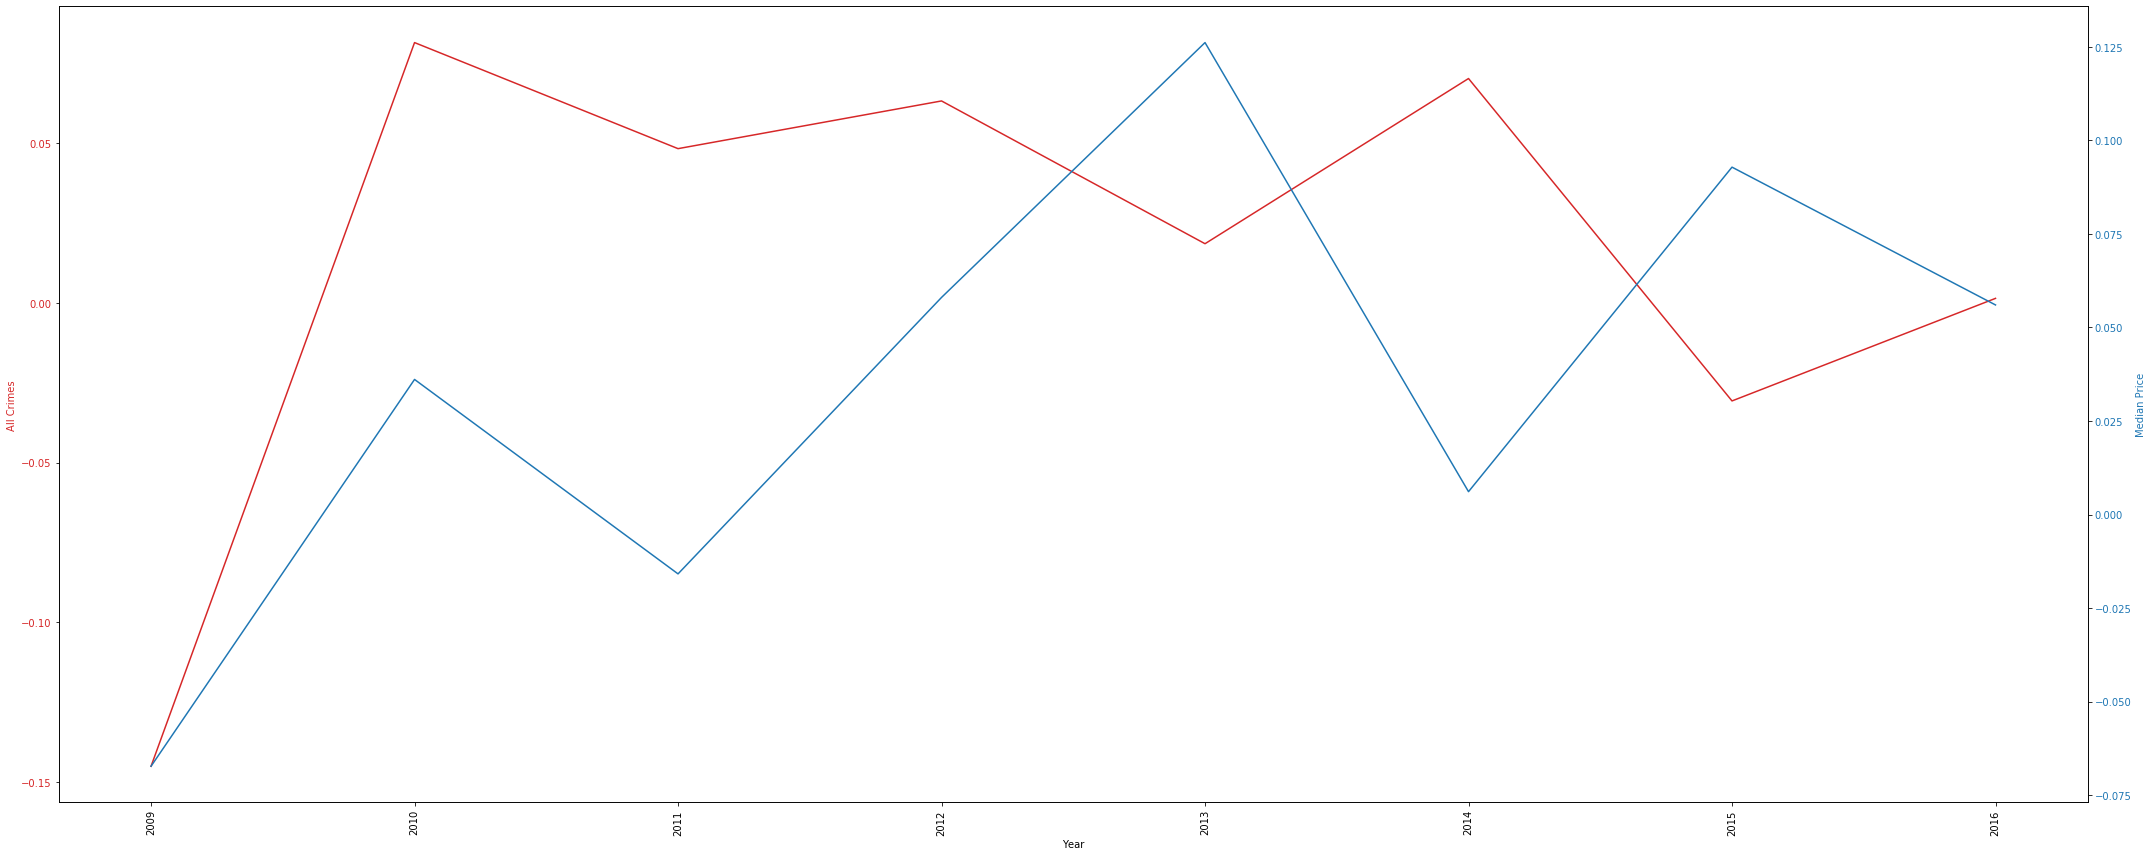

In [11]:
#Percent Change All Crimes Vs Median Price by Year

df08=h_n_c_df['Year']!=2008
h_n_c_df_shrt=h_n_c_df[df08]
h_n_c_df_shrt

fig, ax1 = plt.subplots(figsize=(30, 12))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('All Crimes', color=color)
ax1.plot(h_n_c_df_shrt['Year'], h_n_c_df_shrt['All'], color=color)
plt.xticks(rotation=90)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Median Price', color=color)  # we already handled the x-label with ax1
ax2.plot(h_n_c_df_shrt['Year'], h_n_c_df_shrt['Median_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()